Name: Xiaofeng Ma \
Aalto Student Number: 100315653

In [2]:
%matplotlib inline

Testing the self written randomPlot.py file, where the inputs are the means, variances, and covariance (optional) of a 2D random variable. The output is the distribution figure.

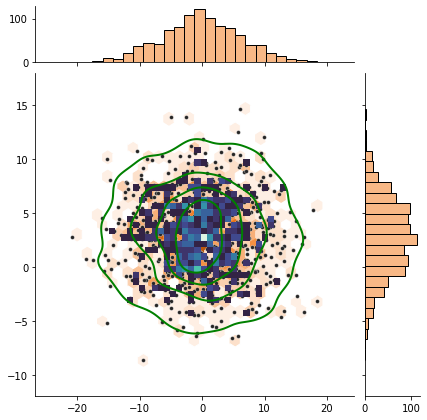

<Figure size 432x288 with 0 Axes>

In [3]:
%run randomPlot.py 0 6 3 3.5

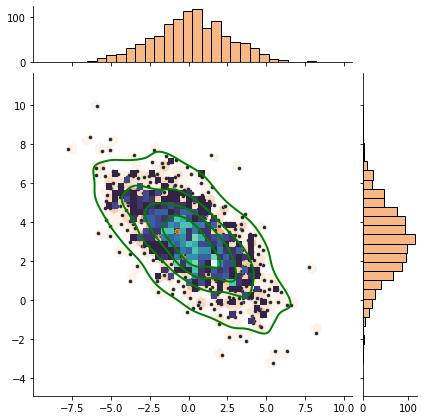

<Figure size 432x288 with 0 Axes>

In [4]:
%run randomPlot.py 0 6 3 3.5  --cov -3

In [5]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# URL
url = 'http://universities.hipolabs.com/search?country=Finland'

# Make a request
response = requests.get(url)

# Decode JSON
response_json = response.json()

# Display
display(response_json[:2])

[{'alpha_two_code': 'FI',
  'name': 'Abo Akademi University',
  'web_pages': ['http://www.abo.fi/'],
  'state-province': None,
  'domains': ['abo.fi'],
  'country': 'Finland'},
 {'alpha_two_code': 'FI',
  'name': 'Central Ostrobothnia University of Applied Sciences',
  'web_pages': ['http://www.cou.fi/'],
  'state-province': None,
  'domains': ['cou.fi'],
  'country': 'Finland'}]

In [7]:
from scipy import integrate
from scipy import linalg

def myfunction(x):
    # you need to define result
    return x

integral = integrate.quad(myfunction, 0.0, 4.0)
print(integral)

(8.0, 8.881784197001252e-14)


In [8]:
A = [[1,0,0],[0,2,0],[0,0,3]]
print(linalg.inv(A))

[[ 1.         -0.         -0.        ]
 [ 0.          0.5        -0.        ]
 [ 0.          0.          0.33333333]]


c:\Users\17854\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


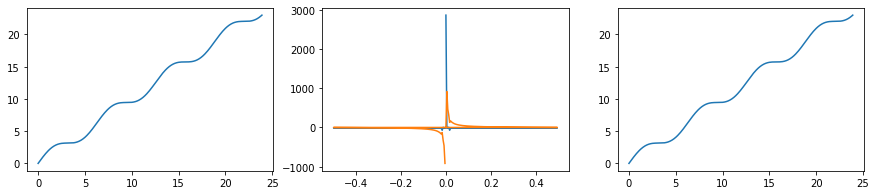

In [9]:
from scipy import fft
fig, ax = plt.subplots(1,3,figsize=(15,3))

t = np.arange(0,24,0.1)
s = np.sin(t)+t
ax[0].plot(t,s)

sp = fft.fft(s)
freq = fft.fftfreq(t.shape[-1])
ax[1].plot(freq, sp.real, freq, sp.imag)

# sp = fft.fftshift(fft.fft(s))
# freq = fft.fftshift(fft.fftfreq(t.shape[-1]))
# ax[2].plot(freq, sp.real, freq, sp.imag)
sp = fft.ifft(sp)
ax[2].plot(t,sp)

plt.show()




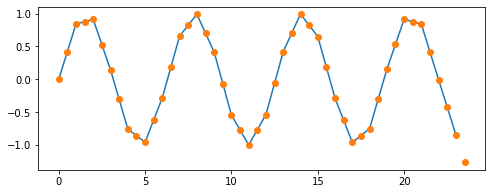

In [10]:
from scipy import interpolate

t2 = np.arange(0,24,1)
x2 = np.sin(t2)

f = interpolate.interp1d(t2, x2, fill_value ='extrapolate')

t3 = np.arange(0,24,0.5)

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(t2,x2)
ax.plot(t3,f(t3),'o')

plt.show()

In [11]:
import time

A = np.random.random((4000,4000))
A = A * A.T
time_start = time.time()
np.linalg.inv(A)
time_end = time.time()
print("time spent for inverting A is", round(time_end - time_start,2), 's')

time spent for inverting A is 2.28 s


In [12]:
def square(x):
    return x*x

In [19]:
%%timeit
result = list(map(square, [1, 2, 3, 4, 5, 6]))
# print(result)

696 ns ± 34.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [20]:
from multiprocess import Pool

In [21]:
%%timeit
with Pool() as pool:
    result = pool.map(square, [1, 2, 3, 4, 5, 6])
# print(result)

375 ms ± 21.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
def sample(n):
    import random
    """Make n trials of points in the square.  Return (n, number_in_circle)

    This is our basic function.  By design, it returns everything it\
    needs to compute the final answer: both n (even though it is an input
    argument) and n_inside_circle.  To compute our final answer, all we
    have to do is sum up the n:s and the n_inside_circle:s and do our
    computation"""
    n_inside_circle = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 < 1.0:
            n_inside_circle += 1
    return n, n_inside_circle



In [23]:
%%timeit
n, n_inside_circle = sample(10**6)

pi = 4.0 * (n_inside_circle / n)

print(pi)

3.139868
3.141044
3.139672
3.142508
3.145496
3.141252
3.139432
3.143704
479 ms ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
with Pool() as pool:
    result = pool.map(sample, [10**5]*10)
[n, n_inside_circle] = [sum(x) for x in zip(*result)]
pi = 4.0 * (n_inside_circle / n)

print(pi)

3.13912
3.139156
3.137684
3.142104
3.13936
3.141732
3.141708
3.140176
513 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
